In [186]:
pip install mglearn

In [187]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [188]:
gen = pd.read_csv('/content/shuffled_gender_voice_dataset.csv')
gen_data = pd.DataFrame(gen)
gen_data.head(100)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.186833,0.027472,0.184325,0.173955,0.204731,0.030777,2.655225,10.565846,0.821812,0.159883,...,0.186833,0.172790,0.023495,0.271186,0.178571,0.007812,0.226562,0.218750,0.108929,female
1,0.188879,0.060316,0.195537,0.138072,0.242975,0.104904,1.497393,5.037085,0.909425,0.374225,...,0.188879,0.133092,0.050847,0.272727,0.855938,0.023438,8.718750,8.695312,0.098712,male
2,0.150705,0.087127,0.174299,0.069666,0.226082,0.156416,2.603951,22.328899,0.969287,0.781729,...,0.150705,0.109992,0.017260,0.266667,1.240954,0.007812,5.562500,5.554688,0.332396,male
3,0.183667,0.040607,0.182534,0.156480,0.207646,0.051166,2.054138,7.483019,0.898138,0.313925,...,0.183667,0.149237,0.018648,0.262295,0.550312,0.007812,3.421875,3.414062,0.166503,female
4,0.205159,0.039543,0.210805,0.186667,0.228908,0.042241,2.099683,7.562209,0.876002,0.271880,...,0.205159,0.154736,0.047105,0.277457,1.578835,0.187500,10.804688,10.617188,0.113644,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.189995,0.060491,0.196663,0.133213,0.246223,0.113010,1.160150,3.992715,0.924797,0.393175,...,0.189995,0.117401,0.047244,0.277457,0.949006,0.023438,5.296875,5.273438,0.088526,male
96,0.168791,0.055144,0.185036,0.121652,0.207498,0.085846,2.755620,17.037535,0.910045,0.369568,...,0.168791,0.104965,0.023358,0.205128,0.240149,0.007812,0.695312,0.687500,0.200930,male
97,0.181031,0.059395,0.193344,0.120187,0.223826,0.103639,1.345898,4.515696,0.911919,0.374933,...,0.181031,0.119688,0.048144,0.265193,0.864329,0.023438,4.570312,4.546875,0.129582,male
98,0.176985,0.042535,0.174951,0.161674,0.186276,0.024603,3.119440,12.702210,0.834589,0.300903,...,0.176985,0.152717,0.049231,0.188235,0.802083,0.164062,5.835938,5.671875,0.233674,female


In [189]:
"""
1 target variable: label (male or female)

20 independent variables:
meanfreq: mean frequency of the voice audio of the person (in kHz)
sd: standard deviation of the frequency of the voice audio
median: median frequency of the voice audio (in kHz)
Q25: first quantile (in kHz)
Q75: third quantile (in kHz)
IQR: interquantile range (in kHz)
skew: Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution
kurt: Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.
sp.ent: spectral entropy
sfm: spectral flatness
mode: mode frequency
centroid: frequency centroid (see specprop)
meanfun: mean fundamental frequency measured across acoustic signal
minfun: minimum fundamental frequency measured across acoustic signal
maxfun: maximum fundamental frequency measured across acoustic signal
meandom: mean of dominant frequency measured across acoustic signal
mindom: minimum of dominant frequency measured across acoustic signal
maxdom: maximum of dominant frequency measured across acoustic signal
dfrange: range of dominant frequency measured across acoustic signal
modindx: modulation index
"""

'\n1 target variable: label (male or female)\n\n20 independent variables:\nmeanfreq: mean frequency of the voice audio of the person (in kHz)\nsd: standard deviation of the frequency of the voice audio\nmedian: median frequency of the voice audio (in kHz)\nQ25: first quantile (in kHz)\nQ75: third quantile (in kHz)\nIQR: interquantile range (in kHz)\nskew: Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution\nkurt: Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.\nsp.ent: spectral entropy\nsfm: spectral flatness\nmode: mode frequency\ncentroid: frequency centroid (see specprop)\nmeanfun: mean fundamental frequency measured across acoustic signal\nminfun: minimum fundamental frequency measured across acoustic signal\nmaxfun: maximum fundamental frequency measured across acoustic signal\nmeandom: mean of dominant frequency measured across acou

In [190]:
"""
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
If the skewness is less than -1 or greater than 1, the data are highly skewed.
"""

'\nIf the skewness is between -0.5 and 0.5, the data are fairly symmetrical.\nIf the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.\nIf the skewness is less than -1 or greater than 1, the data are highly skewed.\n'

In [191]:
# Specprop: This function returns a list of statistical properties of a frequency spectrum, which ahve been defined above.
# For more info you can visit: https://rdrr.io/cran/seewave/man/specprop.html

In [192]:
gen_data.isnull().sum()

,0
meanfreq,0
sd,0
median,0
Q25,0
Q75,0
IQR,0
skew,0
kurt,0
sp.ent,0
sfm,0


In [193]:
gen_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [194]:
# You can see for columns like Q25 and maxdom we have very large range as compared to other columns, for this we have have to standardize or
# normalize the data. You can leave them as it si also but this may bring down the predictive power of the model.

<Axes: >

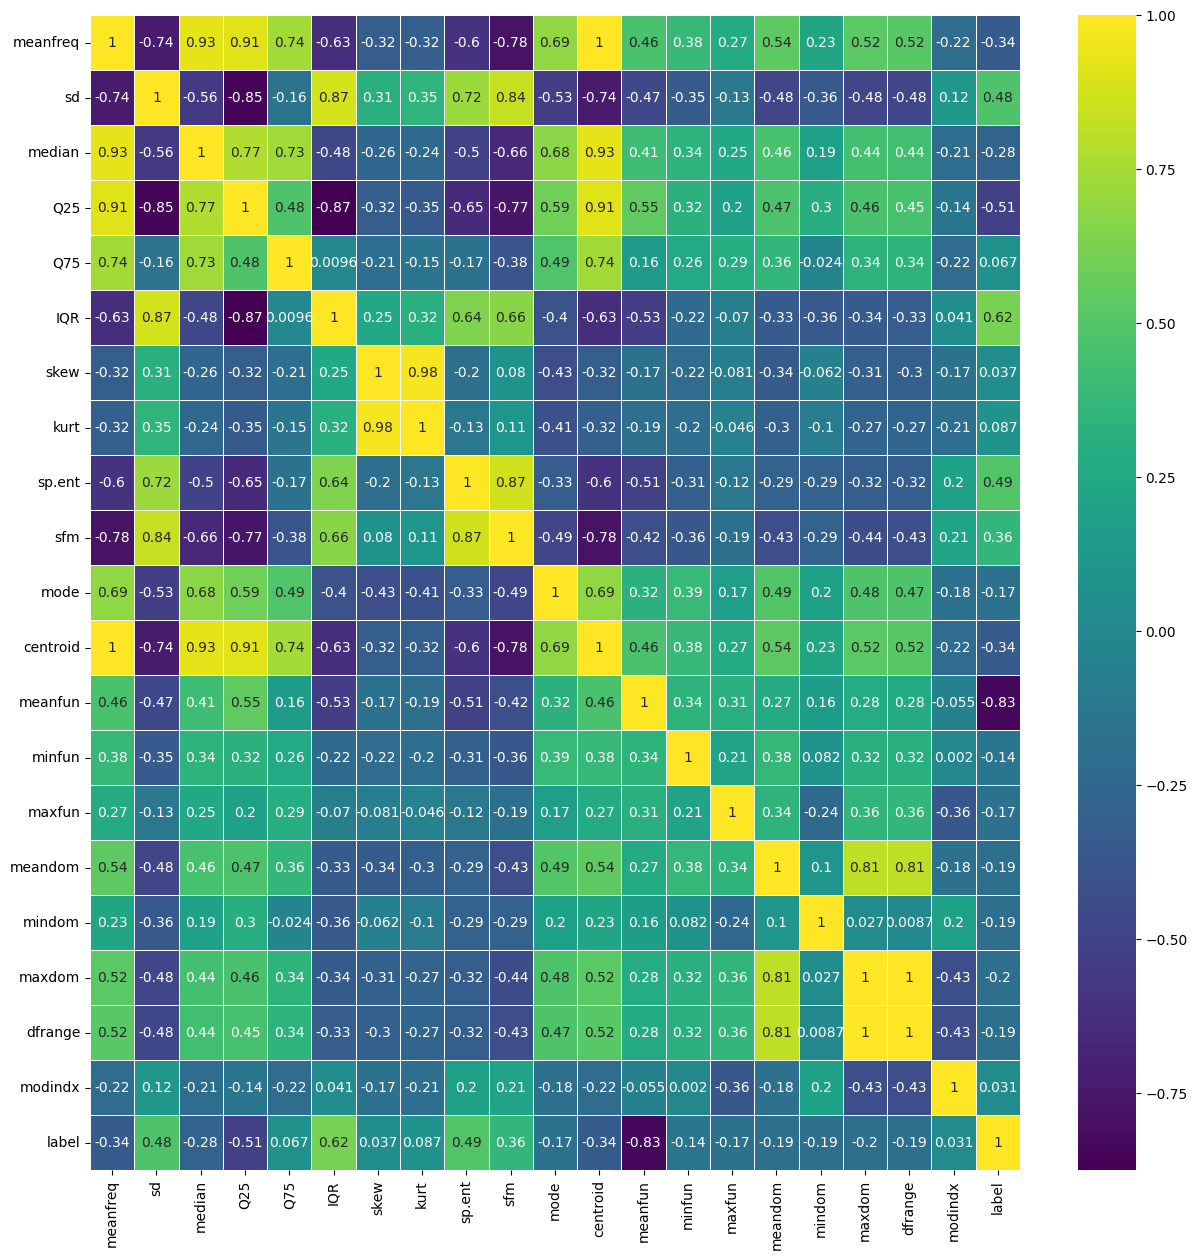

In [195]:
# Convert 'label' column to numerical representation using mapping
gen_data['label'] = gen_data['label'].map({'male': 1, 'female': 0})

# Now, generate the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(gen_data.corr(),annot=True,cmap='viridis',linewidths=.5)

In [196]:
# We already understood about correlation, from here we can see that alot of columns are directly or inversely correlated with some
# other columns having correlation value as high as 0.98
# Hence we will be removinfg some columns that don't help the model in learning or generalizing over the data.

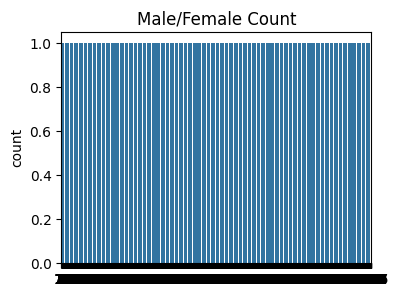

In [197]:
fig, ax = plt.subplots(figsize=(4,3))
sns.countplot(gen_data['label'], ax=ax)
plt.title('Male/Female Count')
plt.show()

In [198]:
# There is no case of imbalance class, meaning one class doesn't dominate in the dataset.

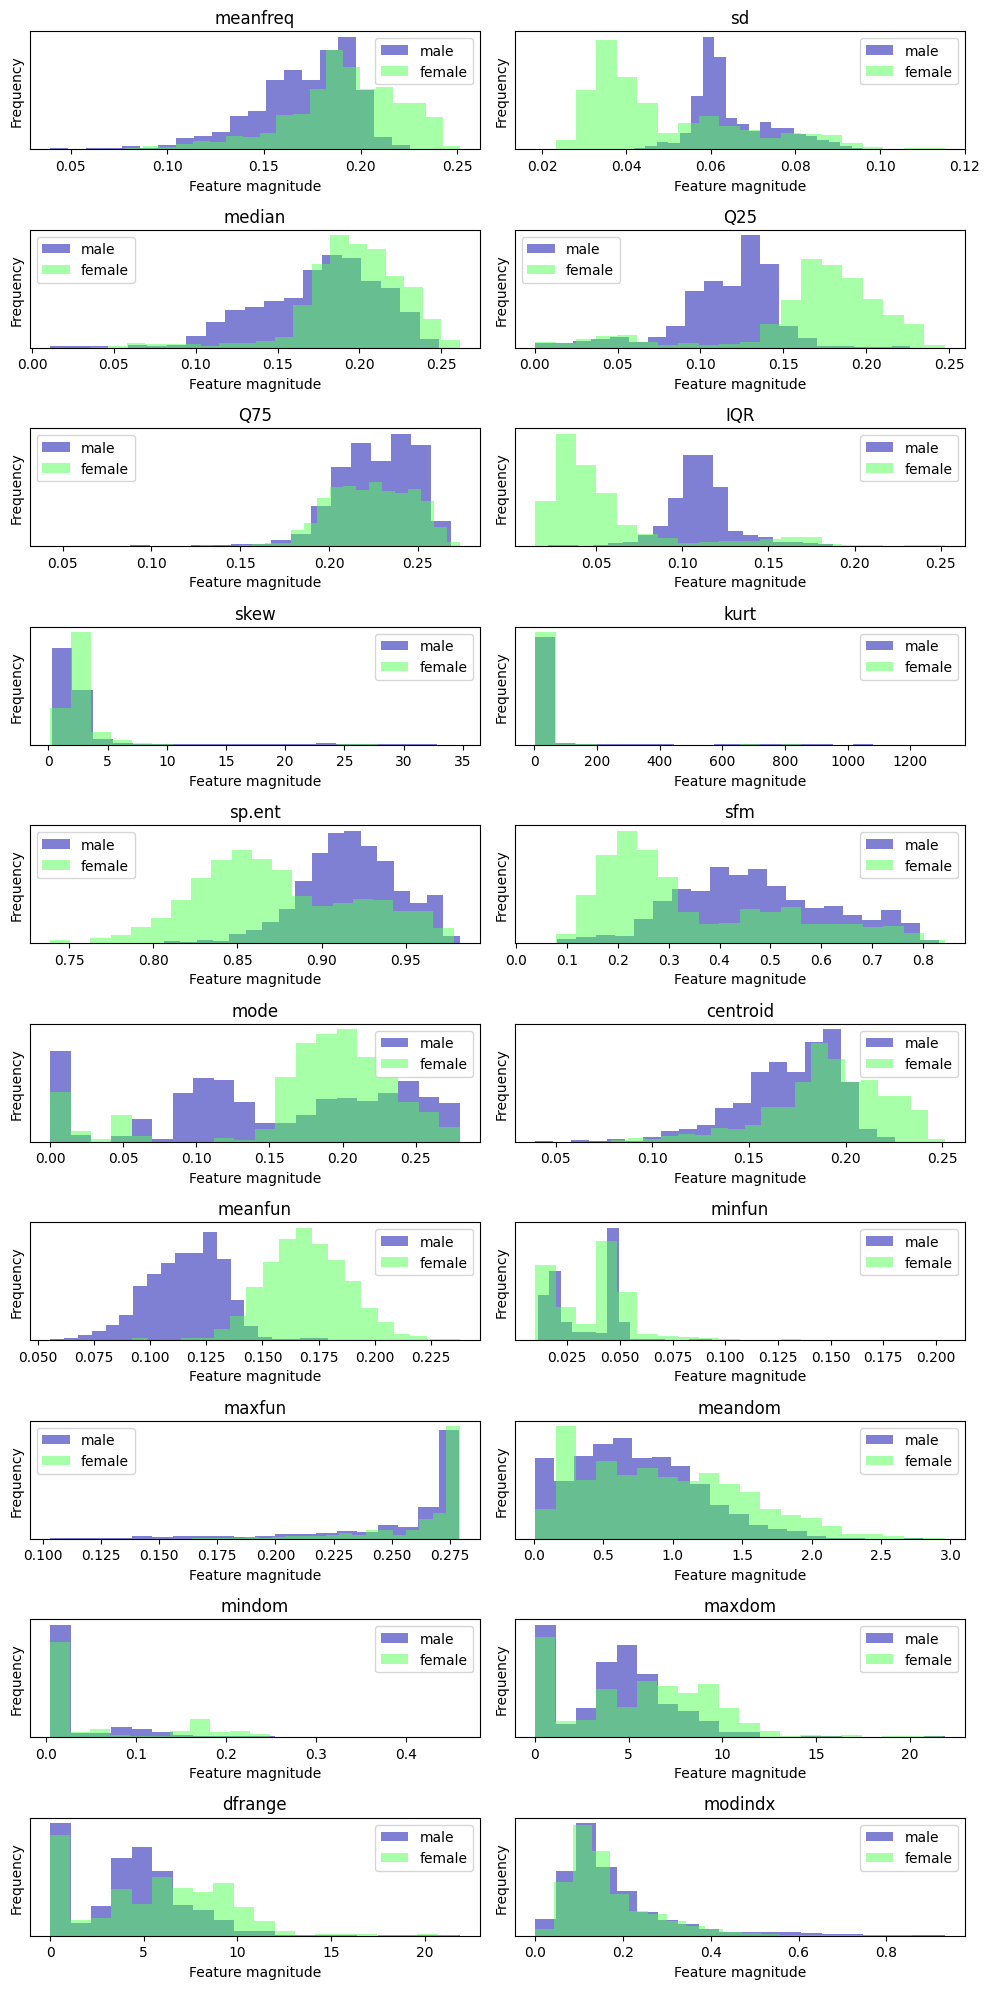

In [199]:
#Plot the histograms
male = gen.loc[gen['label']=='male']
female = gen.loc[gen['label']=='female']
fig, axes = plt.subplots(10, 2, figsize=(10,20))
ax = axes.ravel()
for i in range(20):
    ax[i].hist(male.iloc[:,i], bins=20, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(female.iloc[:, i], bins=20, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(list(male)[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["male", "female"], loc="best")

fig.tight_layout()

In [200]:
# from the graph we can see which are the columns that able to define male and female separetely.

In [201]:
gen_new = gen_data.drop(['median', 'Q25', 'Q75', 'centroid', 'sfm', 'skew', 'minfun', 'mindom', 'maxdom', 'dfrange'], axis = 1)

In [202]:
gen_new.columns

Index(['meanfreq', 'sd', 'IQR', 'kurt', 'sp.ent', 'mode', 'meanfun', 'maxfun',
       'meandom', 'modindx', 'label'],
      dtype='object')

In [203]:
y = gen_new['label']
X = gen_new.drop(['label'], axis = 1)

In [204]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [205]:
#Train support vector machine model
svm = SVC().fit(Xtrain, ytrain)
print("Support Vector Machine")
print("Accuracy on training set: {:.2f}".format(svm.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(svm.score(Xtest, ytest)))

Support Vector Machine
Accuracy on training set: 0.53
Accuracy on test set: 0.51


In [206]:
#Train random forest model
forest = RandomForestClassifier(n_estimators=500, random_state=42).fit(Xtrain, ytrain)
print("Random Forests")
print("Accuracy on training set: {:.2f}".format(forest.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(forest.score(Xtest, ytest)))

Random Forests
Accuracy on training set: 1.00
Accuracy on test set: 0.98


In [207]:
#Train logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(Xtrain, ytrain)
print("Logistic Regression")
print("Accuracy on training set: {:.2f}".format(logreg.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(logreg.score(Xtest, ytest)))

Logistic Regression
Accuracy on training set: 0.91
Accuracy on test set: 0.90


In [208]:
#Train Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(Xtrain, ytrain)
print("Gradient Boosting Classifier")
print("Accuracy on training set: {:.2f}".format(gb_clf.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(gb_clf.score(Xtest, ytest)))

Gradient Boosting Classifier
Accuracy on training set: 0.99
Accuracy on test set: 0.98


In [209]:
#Train K-Nearest Neighbour (KNN) model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors)
knn.fit(Xtrain, ytrain)
print("K-Nearest Neighbors")
print("Accuracy on training set: {:.2f}".format(knn.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(knn.score(Xtest, ytest)))

K-Nearest Neighbors
Accuracy on training set: 0.82
Accuracy on test set: 0.71


In [210]:
#Train Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(Xtrain, ytrain)
print("Decision Tree Classifier")
print("Accuracy on training set: {:.2f}".format(tree.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(tree.score(Xtest, ytest)))

Decision Tree Classifier
Accuracy on training set: 1.00
Accuracy on test set: 0.95


In [211]:
#Train Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(Xtrain, ytrain)
print("Naive Bayes Classifier")
print("Accuracy on training set: {:.2f}".format(nb_classifier.score(Xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(nb_classifier.score(Xtest, ytest)))

Naive Bayes Classifier
Accuracy on training set: 0.94
Accuracy on test set: 0.94


In [212]:
# Well lets go with RandonForestClassifier

In [213]:
# save the model to disk
import pickle
filename = 'drive/MyDrive/DataSet/voice_model.pickle'
pickle.dump(forest, open(filename, 'wb'))

In [214]:
filename = 'drive/MyDrive/DataSet/voice_model.pickle'  # Corrected path
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(Xtest, ytest)

In [215]:
import ipywidgets as widgets
from IPython.display import display
import pickle
import pandas as pd

# Load the model
filename = 'drive/MyDrive/DataSet/voice_model.pickle'
loaded_model = pickle.load(open(filename, 'rb'))

# Feature names and their full forms (updated)
feature_info = {
    'meanfreq': 'Mean Frequency',
    'sd': 'Standard Deviation',
    'IQR': 'Interquartile Range',
    'kurt': 'Kurtosis',
    'sp.ent': 'Spectral Entropy',
    'mode': 'Mode',
    'meanfun': 'Mean Fundamental Frequency',
    'maxfun': 'Maximum Fundamental Frequency',
    'meandom': 'Mean of Dominant Frequency',
    'modindx': 'Modulation Index'
}

# Create input widgets with full forms as descriptions (updated)
input_widgets = {
    feature: widgets.FloatText(description=feature_info[feature])
    for feature in feature_info
}

# Display widgets
for widget in input_widgets.values():
    display(widget)

# Predict button and function
predict_button = widgets.Button(description="Predict")

def predict_gender(button):
    input_values = [input_widgets[feature].value for feature in feature_info]
    input_data = pd.DataFrame([input_values], columns=feature_info)
    prediction = loaded_model.predict(input_data)[0]
    if prediction == 1:
        print("Predicted Gender: Male")
    else:
        print("Predicted Gender: Female")

predict_button.on_click(predict_gender)
display(predict_button)

FloatText(value=0.0, description='Mean Frequency')

FloatText(value=0.0, description='Standard Deviation')

FloatText(value=0.0, description='Interquartile Range')

FloatText(value=0.0, description='Kurtosis')

FloatText(value=0.0, description='Spectral Entropy')

FloatText(value=0.0, description='Mode')

FloatText(value=0.0, description='Mean Fundamental Frequency')

FloatText(value=0.0, description='Maximum Fundamental Frequency')

FloatText(value=0.0, description='Mean of Dominant Frequency')

FloatText(value=0.0, description='Modulation Index')

Button(description='Predict', style=ButtonStyle())